In [55]:
#!/usr/bin/env python
%matplotlib inline
import matplotlib as mpl

import matplotlib.pyplot as plt
#from itertools import izip
import numpy as np

from matplotlib import style
import pandas as pd
import sys

from importlib import reload
reload(sys)
#sys.setdefaultencoding("utf-8")

SIZE = 50 # int(sys.argv[1])
NROWS = 100000 # int(sys.argv[2])
INP = ['output.vectors.w2v'] # sys.argv[3:]


In [56]:
# auth = set()
# with open('dbpedia-nonclass-authorities.tsv') as f:
#     for line in f:
#         line = line[:-1].split('\t')
#         auth.add(line[0])

/home/diemou/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/home/diemou/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


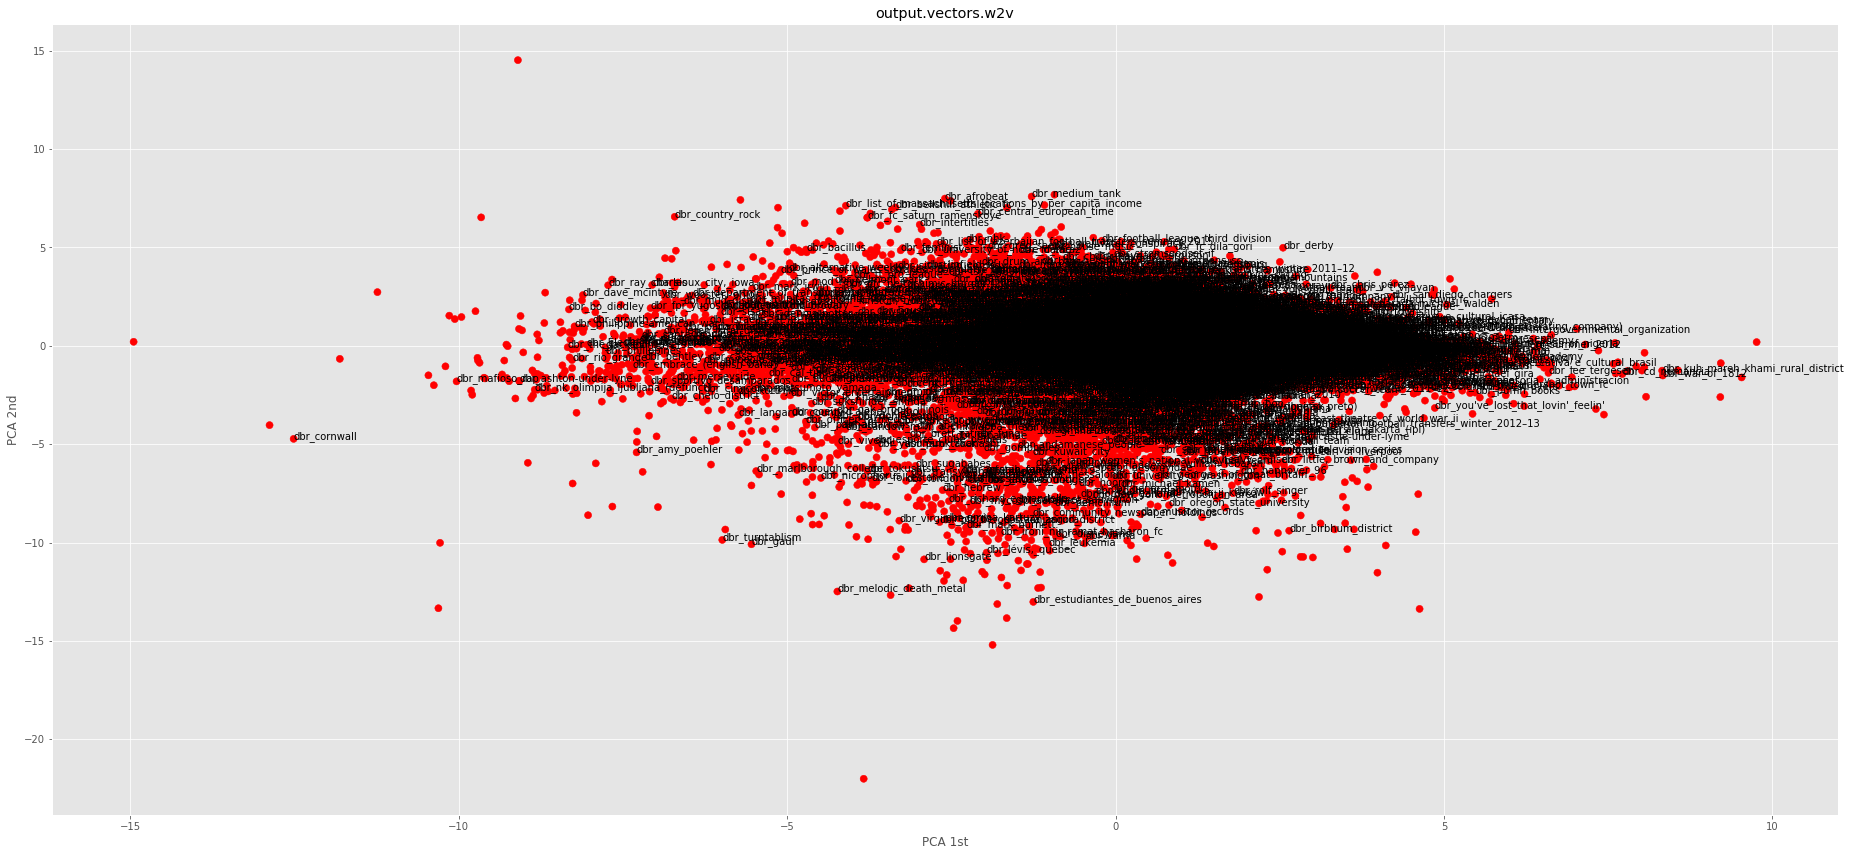

In [57]:
style.use('ggplot')

fig = plt.figure(figsize=(32,32)) # (len(INP)*4, 8))

for j, inp in zip(range(len(INP)), INP):

    df = pd.read_csv(inp, sep=' ', header=None, skiprows=[0], nrows=NROWS)
    
    mat_lab = df.iloc[1:,0].as_matrix()
    mat = df.iloc[:,1:3].as_matrix()
        
    x = list()
    y = list()
    lab = list()
    c = list()
    for i, xy, l in zip(range(len(mat)), mat, mat_lab):
        l = str(l)
        if "dbr_" not in l: 
            continue
#         if l not in auth or "Category:" in l:
#             continue
        #if not(xy[0] > -5 and xy[0] < 5 and xy[1] > -5 and xy[1] < 5):
            #continue
        #print ("xy=",xy," l=",l)
        # adding point
        x.append(xy[0])
        y.append(xy[1])
        lab.append(l)
        #print(l)
        # adding color
        if "dbr_" in l:
           c.append('r')
        elif "dbo_" in l:
           c.append('y')
        elif "_" in l:
           c.append('g')
        else:
           c.append('b')
    
    w = 211 + j
    #print (w)
    ax = fig.add_subplot(w)
    ax.title.set_text(inp)
    ax.set_xlabel('PCA 1st')
    ax.set_ylabel('PCA 2nd')
    ax.scatter(x, y, c=c, marker='o', s=SIZE)
    for i, l in enumerate(lab):
        if i % 10 == 0:
#             ind = max(-1, l.rindex('/'), l.rindex(':'))
#             ax.annotate(l[ind+1:], (x[i], y[i]))
            ax.annotate(l, (x[i], y[i]))

# fig.tight_layout()

# fig.savefig('w2v_output.png', dpi=fig.dpi)